Завдання 2. Аналіз і візуалізація даних

1. Провести аналіз даних. Зробити візуалізацію результатів. Написати висновки.
2. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.
Вивести перші 5 рядків датасету.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету з Google Colab
file_path = ('/content/sample_data/museum_visitors.csv')

# Завантаження даних
df = pd.read_csv(file_path)

# Виведення перших 5 рядків датасету
df.head()


,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [77]:
shape = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()

print("Розмір датасету:", shape)
print("Типи даних:")
print(data_types)
print("Кількість пропусків:")
print(missing_values)

Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [78]:
initial_shape = df.shape  # Розмір початкового датасету
df_no_duplicates = df.drop_duplicates()  # Видалення дублікатів

final_shape = df_no_duplicates.shape

print("Розмір початкової таблиці:", initial_shape)
print("Розмір таблиці без дублікатів:", final_shape)

Розмір початкової таблиці: (59, 5)
Розмір таблиці без дублікатів: (59, 5)


5. Про які роки містить інформацію датасет.

In [79]:
unique_years = df['Date'].str.extract(r'(\d{4})')[0].unique()

print("Унікальні роки у датасеті:")
for year in unique_years:
    print(year)

Унікальні роки у датасеті:
2014
2015
2016
2017
2018


6. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [80]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("Оновлені назви стовпців:")
print(df.columns)

Оновлені назви стовпців:
Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center'],
      dtype='object')


7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [81]:
average_visitors = df.mean()

print("Середня кількість відвідувачів для кожного музею:")
print(average_visitors)

Середня кількість відвідувачів для кожного музею:
avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


<ipython-input-81-8adc5dc9a225>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_visitors = df.mean()


8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [82]:
# Вибір даних для 2018 року
df['date'] = pd.to_datetime(df['date'])

data_2018 = df[df['date'].dt.year == 2018]

# Знаходження мінімальної та максимальної кількості відвідувачів для кожного музею у 2018 році
# Replace the placeholders with the actual column names from your DataFrame
min_visitors_2018 = data_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].min()
max_visitors_2018 = data_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].max()


print("Мінімальна кількість відвідувачів для кожного музею у 2018 році:")
print(min_visitors_2018)
print("\nМаксимальна кількість відвідувачів для кожного музею у 2018 році:")
print(max_visitors_2018)


Мінімальна кількість відвідувачів для кожного музею у 2018 році:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

Максимальна кількість відвідувачів для кожного музею у 2018 році:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [89]:
# Вибір даних за 2015 рік
data_2015 = df[df['date'].dt.year == 2015]

# Групування за місяцями і обчислення загальної кількості відвідувачів
monthly_visitors = data_2015.groupby(data_2015['date'].dt.month)['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center'].sum().sum(axis=1)

highest_month = monthly_visitors.idxmax()
lowest_month = monthly_visitors.idxmin()

month_names = ['січень', 'лютий', 'березень', 'квітень', 'травень', 'червень', 'липень', 'серпень', 'вересень', 'жовтень', 'листопад', 'грудень']

highest_month_name = month_names[highest_month - 1]
lowest_month_name = month_names[lowest_month - 1]

print(f"Місяць з найвищою кількістю відвідувачів у 2015 році: {highest_month_name}")
print(f"Місяць з найнижчою кількістю відвідувачів у 2015 році: {lowest_month_name}")



Місяць з найвищою кількістю відвідувачів у 2015 році: травень
Місяць з найнижчою кількістю відвідувачів у 2015 році: лютий


<ipython-input-89-cf0e9b646b5e>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_visitors = data_2015.groupby(data_2015['date'].dt.month)['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center'].sum().sum(axis=1)


10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [102]:
summer_months = [6, 7, 8]  # Червень, липень, серпень
winter_months = [12, 1, 2]  # Грудень, січень, лютий
avila_adobe_2018 = df[(df['date'].dt.year == 2018)]

# Обчислення кількості відвідувачів у літні та зимові місяці
summer_visitors = avila_adobe_2018[avila_adobe_2018['date'].dt.month.isin(summer_months)]['avila_adobe'].sum()
winter_visitors = avila_adobe_2018[avila_adobe_2018['date'].dt.month.isin(winter_months)]['avila_adobe'].sum()

print("Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року:", summer_visitors)
print("Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року:", winter_visitors)

Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року: 30983


11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [104]:
data_2016 = df[df['date'] == 2016]
correlation = data_2016.corr()

# Виведення матриці кореляції
print("Матриця кореляції:")
print(correlation)

Матриця кореляції:
                                      avila_adobe  firehouse_museum  \
avila_adobe                                   NaN               NaN   
firehouse_museum                              NaN               NaN   
chinese_american_museum                       NaN               NaN   
america_tropical_interpretive_center          NaN               NaN   

                                      chinese_american_museum  \
avila_adobe                                               NaN   
firehouse_museum                                          NaN   
chinese_american_museum                                   NaN   
america_tropical_interpretive_center                      NaN   

                                      america_tropical_interpretive_center  
avila_adobe                                                            NaN  
firehouse_museum                                                       NaN  
chinese_american_museum                                             

<ipython-input-104-275e37abd17c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_2016.corr()


12. Візуалізація даних
Побудувати теплокарту кореляції для попереднього завдання.

<ipython-input-106-9b6f8c00d419>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_2016.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


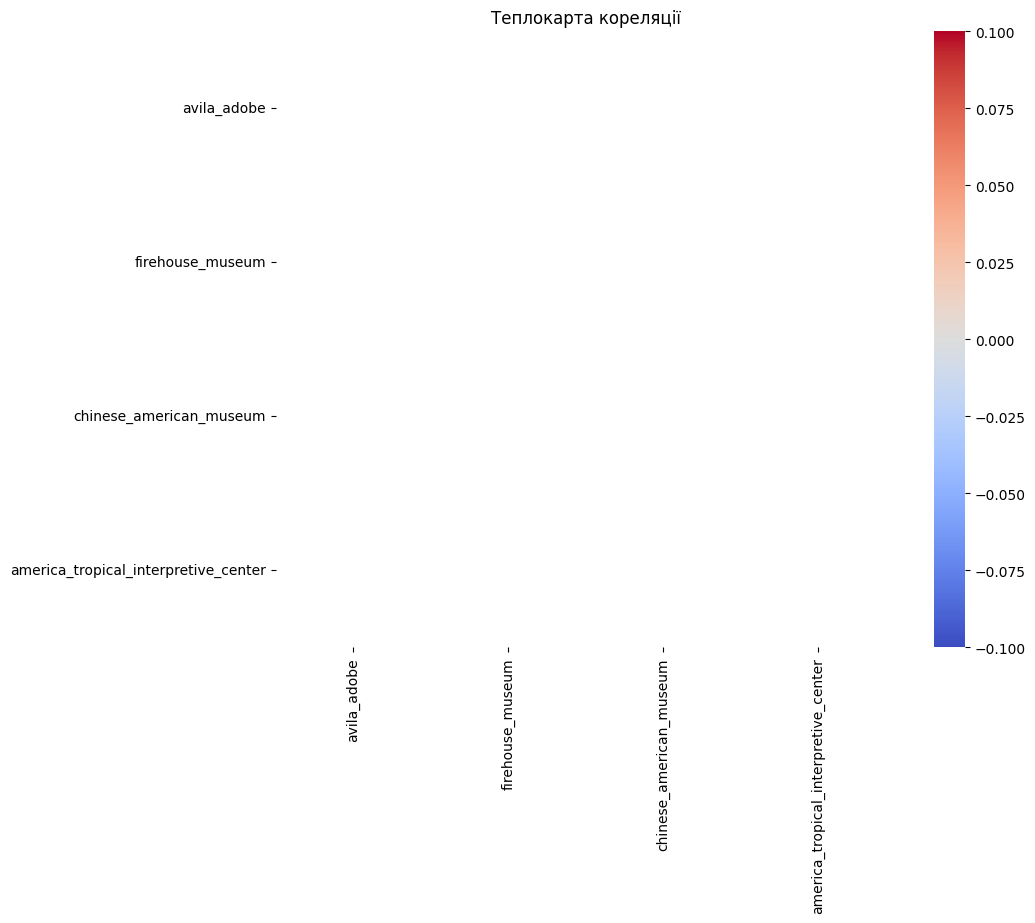

In [106]:
data_2016 = df[df['date'] == 2016]
correlation = data_2016.corr()

# Побудова теплокарти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Теплокарта кореляції')
plt.show()

13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

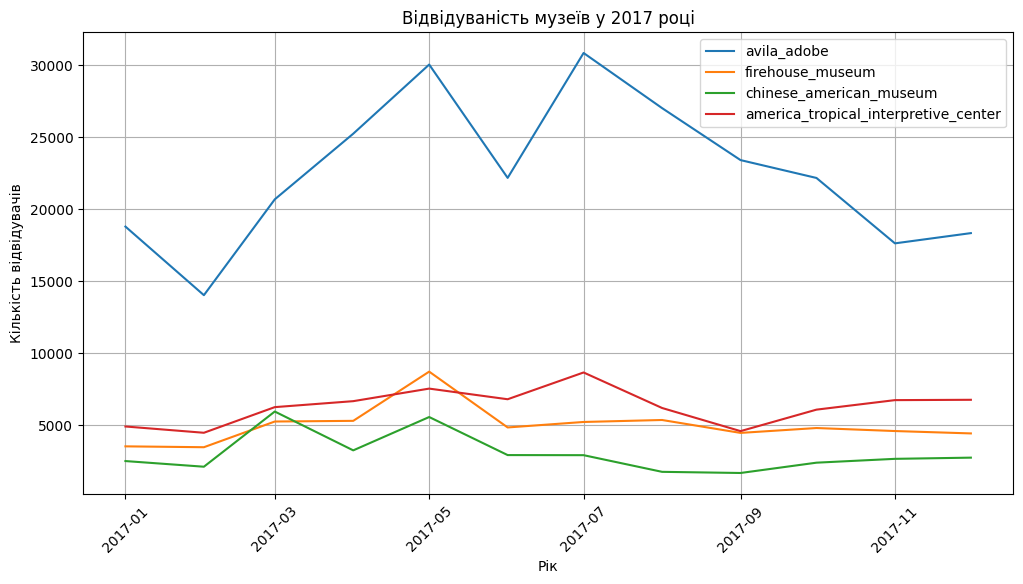

In [118]:
data_2017 = df[df['date'].dt.year == 2017]
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

# Побудова графіка ліній для кожного музею
plt.figure(figsize=(12, 6))
for museum in museum_columns:
    plt.plot(data_2017['date'], data_2017[museum], label=museum)

plt.xlabel('Рік')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)  # Поворот підписів по осі X для зручності
plt.show()



14. Побудувати графіки розсіювання для кожного музею за 2018 рік

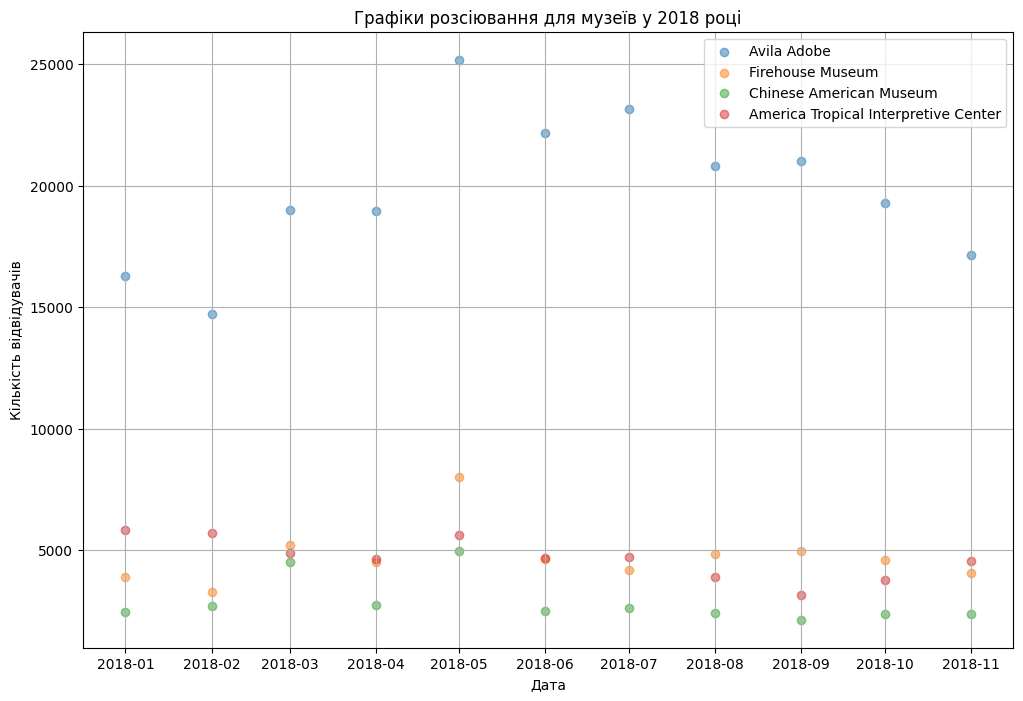

In [120]:
# Побудова графіків розсіювання для кожного музею
plt.figure(figsize=(12, 8))

for museum in museums:
    plt.scatter(data_2018['date'], data_2018[museum.lower().replace(' ', '_')], label=museum, alpha=0.5)

plt.title('Графіки розсіювання для музеїв у 2018 році')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()
plt.grid(True)
plt.show()



15. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

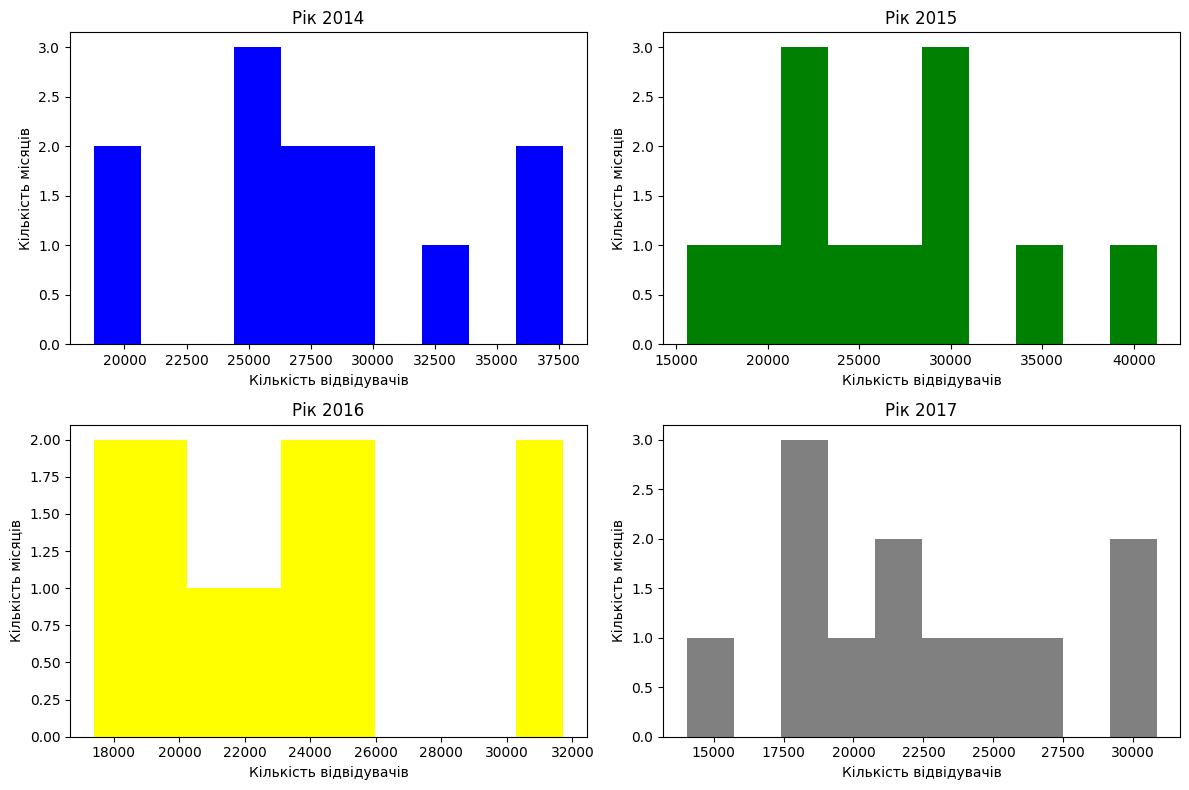

In [128]:
# Перетворення стовпця 'Date' у формат дати
df['date'] = pd.to_datetime(df['date'])

# Розділімо дані за роками
data_2014 = df[df['date'].dt.year == 2014]
data_2015 = df[df['date'].dt.year == 2015]
data_2016 = df[df['date'].dt.year == 2016]
data_2017 = df[df['date'].dt.year == 2017]

# Визначення кольорів для графіків
colors = ['blue', 'green', 'yellow', 'gray']

# Побудова гістограм
plt.figure(figsize=(12, 8))
for i, dataset in enumerate([data_2014, data_2015, data_2016, data_2017]):
    plt.subplot(2, 2, i+1)
    plt.hist(dataset['avila_adobe'], color=colors[i])
    plt.title(f'Рік {2014 + i}')
    plt.xlabel('Кількість відвідувачів')
    plt.ylabel('Кількість місяців')

plt.tight_layout()
plt.show()


Висновок: У  практичній роботі 7 (перша та друга частини),я навчилася усім важливим моментам при аналізу даних за допомогою мови програмування Python та бібліотеки pandas. Основні вміння та знання, які я отримала:первинний аналіз та обробка даних, вибір та фільтрація даних, визначення статистичних показників, робота з датами та візуалізація даних.